In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from darts import TimeSeries
freq='2H3T14S'

In [2]:
def load_dataset(training_file, testing_file):
    dataframes = []
    for data_file in [training_file, testing_file]:
        parser = lambda data_string: datetime.strptime(data_string, '%Y-%m-%d %H:%M:%S')
#         dataframe = pd.read_csv(data_file)
        dataframe = pd.read_csv(data_file, parse_dates=['Time'],
                                date_parser=parser)
        print(f"Rows in {data_file}: {len(dataframe)}")
        dataframe.drop(['Ls', 'LT', 'CO2ice'], axis=1, inplace=True)
#         dataframe.index.name = "Time"

        # if data_file == training_file:
        #     dataframe[TRAINING_FLAG_COLUMN] = True
        # elif data_file == testing_file:
        #     dataframe[TRAINING_FLAG_COLUMN] = False

        dataframes.append(dataframe)

    return pd.concat(dataframes, axis=0)

In [3]:
dataframe = load_dataset('../data/data_files/insight_openmars_training_time.csv',
                         '../data/data_files/insight_openmars_test_time.csv')
dataframe.head()

Rows in ../data/data_files/insight_openmars_training_time.csv: 72196
Rows in ../data/data_files/insight_openmars_test_time.csv: 16364


,Time,Tsurf,Psurf,cloud,vapour,u_wind,v_wind,dust,temp
0,1998-07-15 21:23:39,264.042,721.113,0.092,0.027,-7.451,8.604,0.428,179.686
1,1998-07-15 23:26:53,274.736,705.090,0.145,0.026,-7.053,4.934,0.427,174.502
2,1998-07-16 01:30:07,265.939,700.691,0.105,0.026,-6.825,-0.063,0.427,173.429
3,1998-07-16 03:33:21,238.624,697.252,0.134,0.025,-5.373,-4.048,0.426,173.556
4,1998-07-16 05:36:35,213.634,717.146,0.139,0.026,-3.899,-3.133,0.426,174.789


In [4]:
dataframe.head()

,Time,Tsurf,Psurf,cloud,vapour,u_wind,v_wind,dust,temp
0,1998-07-15 21:23:39,264.042,721.113,0.092,0.027,-7.451,8.604,0.428,179.686
1,1998-07-15 23:26:53,274.736,705.090,0.145,0.026,-7.053,4.934,0.427,174.502
2,1998-07-16 01:30:07,265.939,700.691,0.105,0.026,-6.825,-0.063,0.427,173.429
3,1998-07-16 03:33:21,238.624,697.252,0.134,0.025,-5.373,-4.048,0.426,173.556
4,1998-07-16 05:36:35,213.634,717.146,0.139,0.026,-3.899,-3.133,0.426,174.789


In [5]:
df_time_indexed = dataframe.set_index('Time')
df_time_indexed

,Tsurf,Psurf,cloud,vapour,u_wind,v_wind,dust,temp
Time,,,,,,,,
1998-07-15 21:23:39,264.042,721.113,0.092,0.027,-7.451,8.604,0.428,179.686
1998-07-15 23:26:53,274.736,705.090,0.145,0.026,-7.053,4.934,0.427,174.502
1998-07-16 01:30:07,265.939,700.691,0.105,0.026,-6.825,-0.063,0.427,173.429
1998-07-16 03:33:21,238.624,697.252,0.134,0.025,-5.373,-4.048,0.426,173.556
1998-07-16 05:36:35,213.634,717.146,0.139,0.026,-3.899,-3.133,0.426,174.789
...,...,...,...,...,...,...,...,...
2019-04-19 08:03:34,191.494,747.400,0.000,0.013,0.590,2.064,0.212,190.094
2019-04-19 10:06:49,188.217,747.954,0.000,0.013,0.234,3.252,0.227,194.156
2019-04-19 12:10:03,185.483,746.445,0.003,0.013,0.425,3.746,0.231,194.964


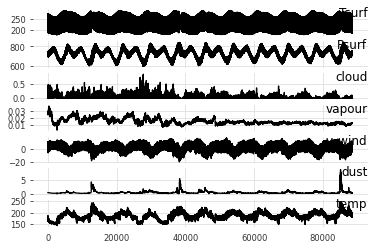

In [6]:
values = df_time_indexed.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df_time_indexed.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [7]:
# Calculating a custom datarange index as the frequencies in observed data are irregular
time = pd.date_range("1998-07-15 21:23:39", periods=len(dataframe), freq=freq)
time

DatetimeIndex(['1998-07-15 21:23:39', '1998-07-15 23:26:53',
               '1998-07-16 01:30:07', '1998-07-16 03:33:21',
               '1998-07-16 05:36:35', '1998-07-16 07:39:49',
               '1998-07-16 09:43:03', '1998-07-16 11:46:17',
               '1998-07-16 13:49:31', '1998-07-16 15:52:45',
               ...
               '2019-04-14 21:15:19', '2019-04-14 23:18:33',
               '2019-04-15 01:21:47', '2019-04-15 03:25:01',
               '2019-04-15 05:28:15', '2019-04-15 07:31:29',
               '2019-04-15 09:34:43', '2019-04-15 11:37:57',
               '2019-04-15 13:41:11', '2019-04-15 15:44:25'],
              dtype='datetime64[ns]', length=88560, freq='7394S')

In [8]:
dataframe.index = time
dataframe = dataframe.drop(['Time'], axis=1)
dataframe.head()

,Tsurf,Psurf,cloud,vapour,u_wind,v_wind,dust,temp
1998-07-15 21:23:39,264.042,721.113,0.092,0.027,-7.451,8.604,0.428,179.686
1998-07-15 23:26:53,274.736,705.090,0.145,0.026,-7.053,4.934,0.427,174.502
1998-07-16 01:30:07,265.939,700.691,0.105,0.026,-6.825,-0.063,0.427,173.429
1998-07-16 03:33:21,238.624,697.252,0.134,0.025,-5.373,-4.048,0.426,173.556
1998-07-16 05:36:35,213.634,717.146,0.139,0.026,-3.899,-3.133,0.426,174.789


In [9]:
series = TimeSeries.from_dataframe(dataframe, time_col=None, value_cols=None, fill_missing_dates=True, freq='7394S', fillna_value=None)

In [10]:
series_Psurf = TimeSeries.from_dataframe(dataframe.Psurf, time_col=None, value_cols=None, fill_missing_dates=True, freq='7394S', fillna_value=None)

AttributeError: 'Series' object has no attribute 'columns'

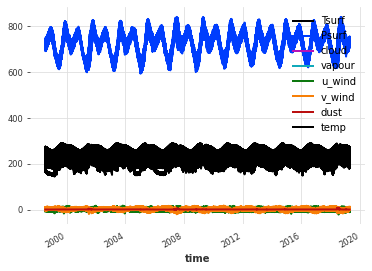

In [11]:
series.plot()

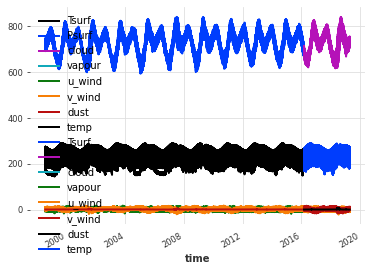

In [12]:
train_series, val_series = series.split_before(0.85)
train_series.plot()
val_series.plot()

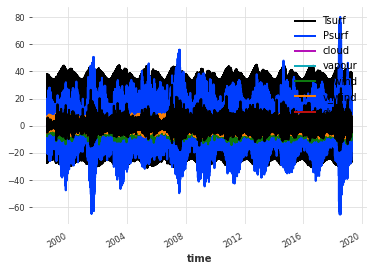

In [60]:
series.diff().plot()


In [63]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train_series)
naive_forecast = naive_model.predict(36)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

[2022-06-19 16:04:12,147] ERROR | darts.timeseries | AssertionError: Only univariate TimeSeries instances support this method
2022-06-19 16:04:12 darts.timeseries ERROR: AssertionError: Only univariate TimeSeries instances support this method


AssertionError: Only univariate TimeSeries instances support this method

In [64]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train_series, m=12, alpha=0.05)

[2022-06-19 16:04:38,063] ERROR | darts.timeseries | AssertionError: Only univariate TimeSeries instances support this method
2022-06-19 16:04:38 darts.timeseries ERROR: AssertionError: Only univariate TimeSeries instances support this method


AssertionError: Only univariate TimeSeries instances support this method